In [116]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nf

In [123]:
data_SICE = nf.Dataset("envisat_SIT_fb_snow-AMSR_sh_2002_2011_ease2_w50000.nc")
variables_SICE = data_SICE.variables
SIT=variables_SICE["SIT"]
variables_SICE

{'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     standard_name: time
     units: days since 2000-01-01 00:00:00
     calendar: standard
     comment: time is fixed to the middle of the 15th of the month
 unlimited dimensions: time
 current shape = (55,)
 filling on, default _FillValue of -2147483647 used,
 'time_bounds': <class 'netCDF4._netCDF4.Variable'>
 float32 time_bounds(time, time_bounds)
     standard_name: time_bounds
     units: days since 2000-01-01 00:00:00
     calendar: standard
 unlimited dimensions: time
 current shape = (55, 2)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(u, v)
     units: degree_north
     long_name: longitude
 unlimited dimensions: 
 current shape = (850, 850)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(u, v)
 unlimited dimensions: 
 current shape = (850, 850)
 

In [124]:
lat  = data_SICE.variables['latitude'][:]
lon  = data_SICE.variables['longitude'][:]

In [125]:
data = data_SICE.variables['SIT'][1,:,:]
data_SICE.close()

/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/home/eebc177student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


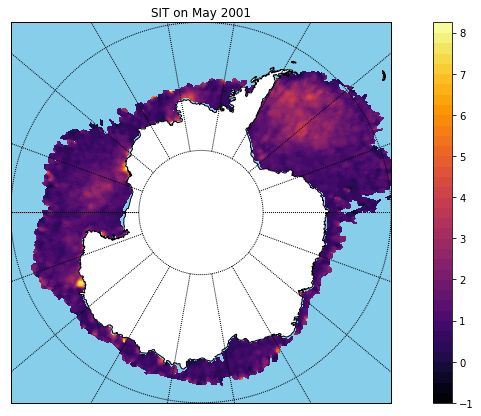

In [126]:
m = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l')

x, y = m(lon, lat)
fig = plt.figure(figsize=(15,7))
m.fillcontinents(color='white',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='skyblue')
m.contourf(x,y,data,40,cmap=plt.cm.get_cmap('inferno'))
plt.title('SIT on May 2001')
plt.colorbar();
